In [27]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from utils import *
from datasets import folder
from inception_score import *

In [18]:
def plot_distribution(mu, sigma):
    x = np.linspace(-5, 5, 5000)
    y_pdf = ss.norm.pdf(x, mu, sigma)
    plt.plot(x, y_pdf, label='pdf')
    plt.legend()
    plt.show()

## Digits Transfer

In [28]:
SVHN_transform = transforms.Compose([transforms.ToTensor(), NormalizeRangeTanh()])
mnist = folder.FolderDataset(data_dir='./results/digits/evals', transform=SVHN_transform)
mean, std = inception_score.get_inception_score(mnist, cuda=False, batch_size=64, resize=True, splits=10)

AttributeError: 'module' object has no attribute 'get_inception_score'

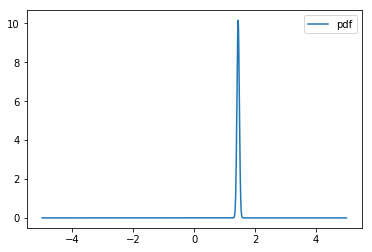

In [10]:
plot_distribution(mu, sigma)